# Put-Call Parity for Option Pricing

* In this section, we will deal only with European options, not American ones.
* We will assume that we:
    1. Buy/Long an European Call option
    2. Sell/Short an European Put option
* Both options have the same underlying asset, the same strike price, and the same time to expiry.
* There are no arbitrage oppurtunities.
* It is possible to borrow or lend any amount of money at the risk-free rate.
* There are no transaction charges.
* Here's the following equation for Put-Call Parity:
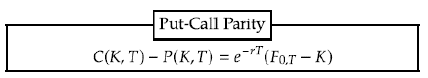

* The Put-Call Parity equations lets you price a put once you know the price of a call and vice versa.

### Pre-liminary Equations and Constants
* $F_{t,T}$ is the price of a forward sold at time t and expring at time T
* $S_{t}$ is the price of a stock at time t
* $(1 + i) = e^{r}$ where $i$ is the annual rate and $r$ is the continuously compounded rate. 
* $K$ is the strike price.
* $T$ the time in years.

## Stock Put-Call Parity

### Non-dividend paying stock
* For a non-dividend paying stock, the forward price is $F_{0,T} = S_{0}e^{rT}$. So, the Put-Call Parity equation becomes $$C(K,T) - P(K,T) = S_{0} - Ke^{-rT}$$

In [1]:
def NonDividend_Stock(S, K, T, i=None, C=None, P=None, r=None):
    if r == None:
        import numpy as np
        r = np.log(1+i)
        
    import math
    e = math.e
        
    if C == None and P == None:
        return "Please input the Price of a Call (C) or Put (P) option"
        
    if C == None:
        C = S - K*e**(-r*T) + P
        return C
    
    if P == None:
        P = C - S + K*e**(-r*T)
        return P

Example: A nondividend paying stock has the following:
* S = 40
* C = 2.84
* K = 45
* T = 9 months
* r = 0.05

Calculate the price of the Premium Option P(45,0.75) selling the stock for 45 after 9 months.

In [2]:
print(NonDividend_Stock(S=40, K=45, T=0.75, C=2.84, r=0.05))

6.183748797436984


### Discrete dividend paying stock
* For a discrete dividend paying stock, we have to account for the present value of dividends, so the Put-Call Parity equation becomes $$C(K,T) - P(K,T) = S_{0} - PV_{0,T}(Divs) - Ke^{-rT}$$

In [3]:
def DiscreteDividend_Stock(S, K, T, delta, i=None, C=None, P=None, r=None):
    if r == None:
        import numpy as np
        r = np.log(1+i)
        
    import math
    e = math.e
        
    if C == None and P == None:
        return "Please input the Price of a Call (C) or Put (P) option"
        
    if C == None:
        C = S*e**(-delta*T) - K*e**(-r*T) + P
        return C
    
    if P == None:
        P = C - S*e**(-delta*T) + K*e**(-r*T)
        return P

Example: Given the following:
* S = 40
* C = 2.34
* K = 50
* T = 1 year
* r = 0.08
* delta = 0.02

Calculate the price of the Premium Option P(50, 1) selling the stock for 50 after 1 year.

In [4]:
print(DiscreteDividend_Stock(40, 50, 1, 0.02, C=2.34, r=0.08))

9.287870387061574


### Continuous dividend paying stock
* For a continuous dividend paying stock, with continuous dividend rate $\delta$,  the Put-Call Parity equation becomes $$C(K,T) - P(K,T) = S_{0}e^{-\delta T} - Ke^{-rT}$$

In [5]:
def ContinuousDividend_Stock(S, K, T, delta, i=None, C=None, P=None, r=None):
    if r == None:
        import numpy as np
        r = np.log(1+i)
        
    import math
    e = math.e
        
    if C == None and P == None:
        return "Please input the Price of a Call (C) or Put (P) option"
        
    if C == None:
        C = S*e**(-delta*T) - K*e**(-r*T) + P
        return C
    
    if P == None:
        P = C - S*e**(-delta*T) + K*e**(-r*T)
        return P

Example: Given the following:
* S = 40
* C = 2.34
* K = 50
* T = 1 year
* r = 0.08
* delta = 0.02

Calculate the price of the Premium Option P(50, 1) selling the stock for 50 after 1 year.

In [6]:
print(ContinuousDividend_Stock(S=40, K=50, T=1, delta=0.02, C=2.34, r=0.08))

9.287870387061574


##  Currency Put-Call Parity

### Currency options
* Let $C(x_{0},K,T)$ be a call option on currency with spot exchange rate $x_{0}$ to purchase it at exchange rate K at time T, and $P(x_{0},K,T)$ be the corresponding put option.
* Let $r_{f}$ be the continuously compounded foreign risk-free rate, which is for the currency playing the role of a stock (purchased for a call option or sold for a put option)
* let $r_{d}$ be the continuously compounded domestic risk free rate, which plays the role of cash in a stock option (the one which the option owner pays in a call option and the one which the option owner receives in a put option)

So, the Put-Call parity equation becomes $$C(x_{0},K,T) - P(x_{0},K,T) = x_{0}e^{-r_{f}T} - Ke^{-r_{d}T}$$

In [7]:
def Currency_Option(x0, K, T, rf, rd, C=None, P=None): 
    import math
    e = math.e
        
    if C == None and P == None:
        return "Please input the Price of a Call (C) or Put (P) option"
        
    if C == None:
        C = x0*e**(-rf*T) - K*e**(-rd*T) + P
        return C
    
    if P == None:
        P = C - x0*e**(-rf*T) + K*e**(-rd*T)
        return P

Example:

* The spot exchange rate for dollars to pounds is $x_{0}$ = 1.4\$/£

* The continuously compounded risk-free rate for dollars is 5% ($r_{d}$ = 0.05)

* The continuously compounded risk-free rate for pounds is 8% ($r_{f}$ = 0.08)

* A 9-month dollar denominated call option, allows to buy 1£ at the rate of 1.50$/£, for a price of 0.023\\$

Calculate the price of the Premium Option P(1.4, 1.5, 0.75) which allows selling £1 at the rate of 1.5$/£.

In [8]:
print(Currency_Option(x0=1.4, K=1.5, T=0.75, rf=0.08, rd=0.05, C=.0223))

0.14862127956328441


# Binomial Trees for Option Pricing

### Introduction
* Binomial Trees is a discrete and computationally intensive way of pricing options. 
* Here's how we evaluate Binary Trees:
  1. Using Binomial Trees, we break the expiry time of options into periods.
  2. An option can only be one of the prices based on each period.
  3. We recursively determine the value of an option by evaluating the payoff under each expiry period and then moving backwards through the tree.

### Risk-Neutral Pricing 

* In a risk-neutral world, one does not expect a premium to make up for the lack of certainty of the payoff. For example, given a choice between having 50 for sure and having a random amount of money with expected value 50, one is indifferent.
* The risk-neutral probability is a theoretical probability that the stock price would rise in a risk neutral world. It assumes:
    1. The current value of an asset is equal to its expected payoff discoutned at the risk-free rate.
    2. There are no arbitrage oppurtunities in the market.
* The risk-neutral probability is purely a mathematical concept and does not represent the probability of anything. We neither assume that all the investors in the market are risk-neutral, nor the fact that risky assets will earn the risk-free rate of return.

## Non-Dividend Paying Stock, One Period

 * We will assume that the underlying asset is a nondividend paying stock.
 * The stock can only have one of 2 values at expiry of the option.
 * We will only deal with European options.

**Pre-liminary Equations or Constants**
* $u$ - factor by which the price will go up
* $d$ - factor by which the price will go down
* $p$ - risk-neutral probability
* $S$ - stock price at time 0
* $S_u$ - Price of stock if its value goes up ($S_u$ = $S*u$)
* $S_d$ - Price of stock if its value goes down ($S_d$ = $S*d$)
* $i$ - annual risk-free interest rate
* $r$ - continuously compounded risk-free interest rate.

In [9]:
def NonDivStock_OnePeriod(Option_type, K, u=None, d=None, p=None, S=None, S_u=None, S_d=None, i=None, r=None):
    if r == None:
        import numpy as np
        r = np.log(1+i)
        
    import math
    e = math.e
    
    if u==None and d==None:
        p = (S/(e**-r) - S_d)/(S_u - S_d)
        
    if S_u == None and S_d == None:
        p = (1/(e**-r) - d)/(u - d)
        S_u = S*u
        S_d = S*d
    
    if Option_type == 'C':
        Option_premium = (e**-r)*((max(S_u - K, 0))*p + (1-p)*(max(S_d - K, 0)))
        return Option_premium
    
    if Option_type == 'P':
        Option_premium = (e**-r)*((max(K - S_u, 0))*p + (1-p)*(max(K - S_d, 0)))
        return Option_premium

Example: Given the following

* Option_type = '$C$'
* $K$ = 55
* $S$ = 50
* $S_u$ = 60
* $S_d$ = 40
* $r$ = 0.05

Calculate the premium of the Call Option C(55, 1) for a single period with a strike price of 55.

In [10]:
print(NonDivStock_OnePeriod(Option_type='C', K=55, S=50, S_u=60, S_d=40, r=0.05))

2.98770575499286


## Non-Dividend Paying Stock, Multi-Period, European Options

* We will assume that the underlying asset is a nondividend paying stock.
* The stock can only have one of the values at expiry of the option.
* We assume that exercise is only possible at the end of a period of the tree

**Pre-liminary Equations or Constants**
* $K$ - strike price
* $S$ - stock price at time 0
* $u$ - factor by which the price will go up
* $d$ - factor by which the price will go down
* $p$ - risk-neutral probability
* $n$ - # of periods
* $t$ - time in years
* $i$ - annual risk-free interest rate
* $r$ - continuously compounded risk-free interest rate

In [11]:
def NonDivStock_MultiPeriod_European(Option_type, K, S, u, d, n, t, r=None, i=None):
    import math
    import numpy as np
    e = math.e
    def fact(y):
        return math.factorial(y)
    
    if r == None:
        r = np.log(1+i)
    
    p = (e**(r*t/n) - d)/(u - d)
    
    option_premium = 0
    
    if Option_type == 'P':
        for x in range(n + 1):
            S_t = (u**x)*(d**(n-x))*S
            payoff = max(K - S_t,0)
            expected_value = fact(n)/(fact(n-x)*fact(x))*(p**x)*((1-p)**(n-x))*payoff
            option_premium += expected_value*e**(-r*t)
            
    if Option_type == 'C':
        for x in range(n + 1):
            S_t = (u**x)*(d**(n-x))*S
            payoff = max(S_t - K,0)
            expected_value = fact(n)/(fact(n-x)*fact(x))*(p**x)*((1-p)**(n-x))*payoff
            option_premium += expected_value*e**(-r*t)
        
    return option_premium

In [12]:
print(NonDivStock_MultiPeriod_European(Option_type='P', K=160, S=150, u=1.3, d=0.7, n=2, t=0.5, r=0.06))

30.298533216327986


## Non-Dividend Paying Stock, Multi-Period, American Options

* We will assume that the underlying asset is a nondividend paying stock.
* The stock can only have one of the values at expiry of the option.
* We still assume that exercise is only possible at the end of a period of the tree.
* The only difference between a tree for an American and an European option is that when pulling back for an American option, the value of the option is the higher of the pulled back value and the exercise value. 

**Pre-liminary Equations or Constants**
* $K$ - strike price
* $S$ - stock price at time 0
* $u$ - factor by which the price will go up
* $d$ - factor by which the price will go down
* $p$ - risk-neutral probability
* $n$ - # of periods
* $t$ - time in years
* $i$ - annual risk-free interest rate
* $r$ - continuously compounded risk-free interest rate

In [13]:
def NonDivStock_MultiPeriod_American(Option_type, K, S, u, d, n, t, r=None, i=None):
    import math
    import numpy as np
    e = math.e
    def fact(y):
        return math.factorial(y)
    
    if r == None:
        r = np.log(1+i)
    
    p = ((e**(r*t/n)) - d)/(u - d)

    option_premium = [0 for i in range(n+1)]
    
    if Option_type == 'P':
        for x in range(n + 1):
            S_t = (u**x)*(d**(n-x))*S
            payoff = max(K - S_t,0)
            option_premium[x] = payoff
            
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                S_t = (u**j)*(d**(i-j))*S
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r*t/n)
                option_premium[j] = max(option_premium[j], K - S_t)
            
    if Option_type == 'C':
        for x in range(n + 1):
            S_t = (u**x)*(d**(n-x))*S
            payoff = max(S_t - K,0)
            option_premium[x] = payoff
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                S_t = (u**j)*(d**(i-j))*S
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r*t/n)
                option_premium[j] = max(option_premium[j], S_t - K)
            
    return option_premium[0]

In [14]:
print(NonDivStock_MultiPeriod_American(Option_type='P', K=160, S=150, u=1.3, d=0.7, n=2, t=0.5, r=0.06))
print(NonDivStock_MultiPeriod_American(Option_type='P', K=100, S=100, u=1.1, d=1/1.1, n=3, t=1, r=0.06))

31.41273787605691
4.654588754602527


## Currency Exchange Rate, Multi-Period, European Options

* We will assume that the underlying asset is a currnecy exchange rate.
* The currnecy exchange rate can only have one of the values at expiry of the option.
* We assume that exercise is only possible at the end of a period of the tree.
* The risk-free rate is the domestic (the one on which the strike price is based) risk-free rate. The foreign risk-free rate (the one on which the currency can be elected to be received or paid) is the continuous dividend rate.

**Pre-liminary Equations or Constants**
* $K$ - strike exchange rate
* $E$ - excahnge rate at time 0
* $u$ - factor by which the exchange rate will go up
* $d$ - factor by which the exchange rate will go down
* $p$ - risk-neutral probability
* $n$ - # of periods
* $t$ - time in years
* $r_f$ - foreign risk-free rate
* $r_d$ - domestic risk-free rate 

In [15]:
def Currency_MultiPeriod_European(Option_type, K, E, u, d, n, t, r_f, r_d):
    import math
    import numpy as np
    e = math.e
    def fact(y):
        return math.factorial(y)
    
    p = (e**((r_d-r_f)*t/n) - d)/(u - d)
    
    option_premium = 0
    
    if Option_type == 'P':
        for x in range(n + 1):
            E_t = (u**x)*(d**(n-x))*E
            payoff = max(K - E_t,0)
            expected_value = fact(n)/(fact(n-x)*fact(x))*(p**x)*((1-p)**(n-x))*payoff
            option_premium += expected_value*e**(-r_d*t)
            
    if Option_type == 'C':
        for x in range(n + 1):
            E_t = (u**x)*(d**(n-x))*E
            payoff = max(E_t - K,0)
            expected_value = fact(n)/(fact(n-x)*fact(x))*(p**x)*((1-p)**(n-x))*payoff
            option_premium += expected_value*e**(-r_d*t)
        
    return option_premium

In [16]:
print(Currency_MultiPeriod_European(Option_type='C', K=1.25, E=1.15, u=1.053903, d=0.95361, n=2, t=0.5, r_f=0.04, r_d=0.05))

0.006332134342003761


## Currency Exchange Rate, Multi-Period, American Options

* We will assume that the underlying asset is a currnecy exchange rate.
* The currnecy exchange rate can only have one of the values at expiry of the option.
* We assume that exercise is only possible at the end of a period of the tree.
* The risk-free rate is the domestic (the one on which the strike price is based) risk-free rate. The foreign risk-free rate (the one on which the currency can be elected to be received or paid) is the continuous dividend rate.
* The only difference between a tree for an American and an European option is that when pulling back for an American option, the value of the option is the higher of the pulled back value and the exercise value. 


**Pre-liminary Equations or Constants**
* $K$ - strike exchange rate
* $E$ - excahnge rate at time 0
* $u$ - factor by which the exchange rate will go up
* $d$ - factor by which the exchange rate will go down
* $p$ - risk-neutral probability
* $n$ - # of periods
* $t$ - time in years
* $r_f$ - foreign risk-free rate
* $r_d$ - domestic risk-free rate 

In [17]:
def Currency_MultiPeriod_American(Option_type, K, E, u, d, n, t, r_f, r_d):
    import math
    import numpy as np
    e = math.e
    def fact(y):
        return math.factorial(y)
    
    p = (e**((r_d-r_f)*t/n) - d)/(u - d)
    
    option_premium = [0 for i in range(n+1)]
    
    if Option_type == 'P':
        for x in range(n + 1):
            E_t = (u**x)*(d**(n-x))*E
            payoff = max(K - E_t,0)
            option_premium[x] = payoff
            
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                E_t = (u**j)*(d**(i-j))*E
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r_d*t/n)
                option_premium[j] = max(option_premium[j], K - E_t)
            
    if Option_type == 'C':
        for x in range(n + 1):
            E_t = (u**x)*(d**(n-x))*E
            payoff = max(E_t - K,0)
            option_premium[x] = payoff
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                E_t = (u**j)*(d**(i-j))*E
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r_d*t/n)
                option_premium[j] = max(option_premium[j], E_t - K)
            
    return option_premium[0]

In [18]:
print(Currency_MultiPeriod_American(Option_type='C', K=1.25, E=1.15, u=1.053903, d=0.95361, n=2, t=0.5, r_f=0.04, r_d=0.05))

0.006332134342003762


## Pricing Options on Futures, Multi-Period, American Options

* We will assume that the underlying asset is a futures contract, having the same price as a forward. Futures contracts pay no dividends
* An option may have the same expiry as the futures contract, or the futures contract may expire later.
* Exercising the option enters one into a futures contract.
* The futures contract can only have one of the values at expiry of the option.
* We assume that exercise is only possible at the end of a period of the tree.
* When pulling back for an American option, the value of the option is the higher of the pulled back value and the exercise value. 


**Pre-liminary Equations or Constants**
* $K$ - Strike price
* $F$ - Futures contract price at time 0
* $u$ - factor by which the futures contract will go up
* $d$ - factor by which the futures contract will go down
* $p$ - risk-neutral probability
* $n$ - # of periods
* $t$ - time in years
* $i$ - annual risk-free interest rate
* $r$ - continuously compounded risk-free interest rate

In [19]:
def Futures_MultiPeriod_American(Option_type, K, F, u, d, n, t, i=None, r=None):
    import math
    import numpy as np
    e = math.e
    def fact(y):
        return math.factorial(y)
    
    if r == None:
        r = np.log(1+i)
    
    p = (1 - d)/(u - d)
    
    option_premium = [0 for i in range(n+1)]
    
    if Option_type == 'P':
        for x in range(n + 1):
            F_t = (u**x)*(d**(n-x))*F
            payoff = max(K - F_t,0)
            option_premium[x] = payoff
            
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                F_t = (u**j)*(d**(i-j))*F
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r*t/n)
                option_premium[j] = max(option_premium[j], K - F_t)
            
    if Option_type == 'C':
        for x in range(n + 1):
            F_t = (u**x)*(d**(n-x))*F
            payoff = max(F_t - K,0)
            option_premium[x] = payoff
            
        for i in range(n-1,-1,-1):
            for j in range(0,i+1):
                F_t = (u**j)*(d**(i-j))*F
                option_premium[j] = (option_premium[j+1]*(p) + (1-p)*option_premium[j])*e**(-r*t/n)
                option_premium[j] = max(option_premium[j], F_t - K)
            
    return option_premium[0]

In [20]:
print(Futures_MultiPeriod_American(Option_type='C', K=60, F=60, u=1.090463, d=0.917042, n=3, t=3/12, r=0.05))
print(Futures_MultiPeriod_American(Option_type='P', K=640, F=650, u=1.193365, d=0.837967, n=2, t=1, r=0.04))

3.8545899550993865
52.21233211694692


# Black-Scholes Formula for Option Pricing

### Introduction
* The Black-Scholes formula is a closed-form formula for evaluating the value of an European option.
The general form of the formula, the price at time 0 of a European call option expiring at time $T$ on an asset $S$ is 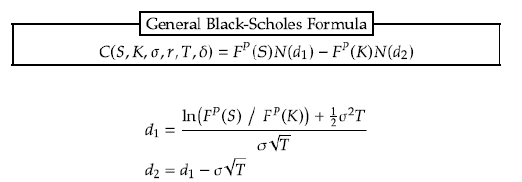

### Assumptions of the Black-Scholes Formula
* Continuously compounded returns on the stock are normally distributed and independent over time.
* Continuously compounded returns on the strike asset (e.g., the risk-free rate) are known and constant.
* Volatility is known and constant.
* Dividends are known and constant.
* There are no transaction costs or taxes.
* It is possible to short-sell any amount of stock and to borrow any amount of money at the risk-free rate.

## Black-Scholes Formula for Common Stock Options

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $\delta$ - The continuous dividend rate
* $F^{P}(S)$ = $Se^{-\delta T}$ - Prepaid forward price of the Stock
* $K$ - The strike asset, cash
* $F^{P}(K)$ = $Ke^{-rT}$ - Prepaid forward price of the strike asset
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility

Transforming the prepaid formulas, we get:

* $F^{P}(S)$ = $Se^{-\delta T}$ $\rightarrow$ ln$F^{P}(S)$ = ln$S$ $-\delta T$
* $F^{P}(K)$ = $Ke^{-rT}$ $\rightarrow$ ln$F^{P}(K)$ = ln$K$ $-rT$

So the Black-Scholes Formula for call options becomes:
* $C(S,K,\sigma,r,T,\delta) = Se^{-\delta T}N(d_1) -Ke^{-rT}N(d_2)$

For the put option, the roles of S and K are reversed. The Black-Scholes formula can be written as:
* $P(S,K,\sigma,r,T,\delta) = Ke^{-rT}N(-d_2) -Se^{-\delta T}N(-d_1)$

where
* $d_1 = \frac{ln\frac{S}{K} + (r -\delta + \frac{1}{2}\sigma^2)T}{\sigma \sqrt T}$
* $d_2 = d1 - \sigma \sqrt T$

For a 3-month 52-strike European options on a stock, you are given:

* The stock's price follows the Black-Scholes framework.
* The stock's price is 50
* The stock's volatility is 0.4
* The stock's continuous dividend rate is 4%
* The continuously compounded risk-free interest rate is 8%

Calculate the premium for call and put options.

In [21]:
def BlackScholes_Stock(Option_type, S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    N_d1 = norm.cdf(d_1)
    N_d2 = norm.cdf(d_2)
    
    if Option_type == 'C':
        premium = (S*e**(-T*delta))*(N_d1) - (K*e**(-r*T))*(N_d2)
        
    else:
        premium = (K*e**(-r*T))*(1 - N_d2) - (S*e**(-T*delta))*(1 - N_d1)
        
    return premium

In [22]:
print('Call premium',BlackScholes_Stock("C", 50, 52, 0.4, 0.08, 3/12, 0.04))
print('Put premium', BlackScholes_Stock("P", 50, 52, 0.4, 0.08, 3/12, 0.04))

Call premium 3.3101837999630916
Put premium 4.778023124455963


## Black-Scholes Formula for Common Stock Options w/ Discrete Dividends

* The Black-Scholes formula's parameter $\sigma$ is the volatility of the stock, or $\sqrt {Var(ln(S_1/S_0)}$ 
* The Black-Scholes model assumes that $S_t$ is continuous. If $S_t$ is not continuous because fo discrete dividends, it does not satisfy the hypothesis of the Black-Scholes model.
* Instead, the Black-Scholes model must be applied to the prepaid forward price. Therefore, $\sigma$ is defined as the voaltility of the **prepaid forward**
* We will assume that $\sigma$ is the volatility of the prepaid forward. If a stock pays continuous dividends, the the volatility of the stock equals the volatility of the prepaid forward.

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $F^{P}(S)$ = $S -PV(Divs)$ - Prepaid forward price of the Stock
* $K$ - The strike asset, cash
* $D$ - Dividend amount
* $F^{P}(K)$ = $Ke^{-rT}$ - Prepaid forward price of the strike asset
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the prepaid forward
* $t$ - time to first dividend in years
* $D_t$ - dividend frequency in years


So the Black-Scholes Formula for call options becomes:
* $C(S,K,\sigma,r,T,\delta) = F^{P}(S)N(d_1) -Ke^{-rT}N(d_2)$

For the put option, the roles of S and K are reversed. The Black-Scholes formula can be written as:
* $P(S,K,\sigma,r,T,\delta) = Ke^{-rT}N(-d_2) -F^{P}(S)N(-d_1)$

where
* $d_1 = \frac{ln\frac{F^{P}(S)}{K} + (r + \frac{1}{2}\sigma^2)T}{\sigma \sqrt T}$
* $d_2 = d1 - \sigma \sqrt T$

In [23]:
def PV_Divs(D, t, D_rate, T, r):
    import math
    e = math.e
    remaining_divs = int((T - t)//(D_rate))
    
    present_value = 0
    for i in range(remaining_divs + 1):
        present_value += D*e**(-r*(t + i*D_rate))
        
    return present_value

def BlackScholes_Discrete_Stock(Option_type, S, K, sigma, D, t, D_rate, T, r):
    import numpy as np
    import math
    
    e = math.e
    
    Prepaid_Forward_Price = S - PV_Divs(D, t, D_rate, T, r)
    
    d_1 = (np.log(Prepaid_Forward_Price/K) + (r + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    N_d1 = norm.cdf(d_1)
    N_d2 = norm.cdf(d_2)
    
    if Option_type == 'C':
        premium = Prerpaid_Forward_Price*(N_d1) - (K*e**(-r*T))*(N_d2)
        
    else:
        premium = (K*e**(-r*T))*(1 - N_d2) - Prepaid_Forward_Price*(1 - N_d1)
        
    return premium
    

In [24]:
print(BlackScholes_Discrete_Stock('P',42, 40, 0.3, 0.75, 3/12, 3/12, 6/12, 0.04))

2.7506667618442613


## Black-Scholes Formula for Currency Options

* For a currency option, the domestic risk-free rate serves as $r$ and the foreign risk-free rate serves as $\delta$

**Pre-liminary Equations or Constants**
* $x$ - Current exchange rate, the number of units of domestic currency per unit of foreign currency.
* $F^{P}(x) = xe^{-r_fT}$
* $F^{P}(K) = Ke^{-rT}$
* $K$ - The strike asset, exchange rate
* $\sigma$ - Volatility of the exchange rate
* $r$ - Domestic risk-free rate
* $T$ - Time in years for option expiry
* $r_f$ - the foreign risk-free rate

So the Black-Scholes Formula for call options becomes:
* $C(x,K,\sigma,r,T,r_f) = xe^{-r_fT}N(d_1) -Ke^{-rT}N(d_2)$

For the put option, the roles of S and K are reversed. The Black-Scholes formula can be written as:
* $P(x,K,\sigma,r,T,r_f) = Ke^{-rT}N(-d_2) -xe^{-r_fT}N(-d_1)$

where
* $d_1 = \frac{ln\frac{x}{K} + (r - r_f + \frac{1}{2}\sigma^2)T}{\sigma \sqrt T}$
* $d_2 = d1 - \sigma \sqrt T$

In [25]:
def BlackScholes_Currency(Option_type, x, K, sigma, r, T, r_f):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(x/K) + (r - r_f + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    N_d1 = norm.cdf(d_1)
    N_d2 = norm.cdf(d_2)
    
    if Option_type == 'C':
        premium = x*(e**-r_f*T)*(N_d1) - (K*e**(-r*T))*(N_d2)
        
    else:
        premium = (K*e**(-r*T))*(1 - N_d2) - x*(e**-r_f*T)*(1 - N_d1)
        
    return premium

Example: You are given

* The spot exchange rate for yen in dollars is 0.009\$/¥
* $\sigma$ = 0.05
* The continuously compounded risk-free rate for yen is 2%
* The continuously compounded risk-free rate for dollars is 4%

Calculate the Black-Scholes price for a 1-year European dollar-denominated call option on yen with a stirke price of 0.010

In [26]:
print(BlackScholes_Currency("C",0.009, 0.010, 0.05, 0.04, 1, 0.02))

8.269547510135196e-06


## Black-Scholes Formula for Options on Futures

* At the time of option expiry, the payoff on a call option will be excess of the forward price (not the prepaid forward price) over the stirke price, if this is greater than 0
* In the case of a future, we discount the forward price and the strike price at the rate $r$.
* If the option period and the futures period are the same, then the option is equivalent to an option on the stock. But, in general, forwards don't need to have the same duration as the options. 

**Pre-liminary Equations or Constants**
* $F$ - Forward price
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the future

So the Black-Scholes Formula for call options becomes:
* $C(F,K,\sigma,r,T) = Fe^{-rT}N(d_1) -Ke^{-rT}N(d_2)$

For the put option, the roles of S and K are reversed. The Black-Scholes formula can be written as:
* $P(F,K,\sigma,r,T) = Ke^{-rT}N(-d_2) -Fe^{-rT}N(-d_1)$

where
* $d_1 = \frac{ln\frac{F}{K} + \frac{1}{2}\sigma^2T}{\sigma \sqrt T}$
* $d_2 = d1 - \sigma \sqrt T$

In [27]:
def BlackScholes_Futures(Option_type, F, K, sigma, r, T):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(F/K) + (0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    N_d1 = norm.cdf(d_1)
    N_d2 = norm.cdf(d_2)
    
    if Option_type == 'C':
        premium = F*(e**-r*T)*(N_d1) - (K*e**(-r*T))*(N_d2)
        
    else:
        premium = (K*e**(-r*T))*(1 - N_d2) - F*(e**-r*T)*(1 - N_d1)
        
    return premium

Example: A futures contract on silver has a price of 10 for delivery at the end of 1 year. Volatility is 0.25. The continuously compounded risk-free rate is 4%. Calculate the premium for a 1-year European call option on the futures contract with strike price 10.

In [28]:
print(BlackScholes_Futures('C', 10, 10, 0.25, 0.04, 1))

0.9557592227791272


# The Black-Scholes Formula: Greeks

### Introduction
* The Black-Scholes formula, expresses the value of a Call (C) or Put (P) in terms of six arguments. By Differentiating (C or P) with respect to these arguments, we can estimate the change in value of a call or put option in response to the change in value of one of these arguments. This is useful if one wishes to hedge the option.then moving backwards through the tree.

### Definition of the Greeks

* **Delta ($\Delta$)**: is the increase in the option price per increase in stock price.
* **Gamma ($\Gamma$)**: is the increase in Δ per increase in stock price.
* **Vega**: not a greek letter, is the increase in the option price per percentage point increase in volatility.
* **Theta ($\theta$)**: is the increase in the option price for an option with a fixed expiry date per time elapsed. In other words, it is the increase in option price per **decrease** in time to expiry.
* **Rho ($\rho$)**: is the increase in the option price per increase in $r$, the continuously compounded risk-free return. The increase in the risk-free return is measured in percentage points (0.01) or basis points (0.0001).
* **Psi ($\Psi$)**: is the increase in the option price per increase in $\delta$, the continuous dividend yield. The increase in dividend yield is measured in percentage points (0.01) or basis points (0.0001).

## Greeks: Delta

* Measures the change in option price as a function of the change in stock price.
* Mathematically, it is the derivative of the Put-Call parity equation with respect to $S$, the stock price.
* A call option becomes more valuable as the stock price increases, but cannot increase in value more than the stock price, so delta is between 0 and 1. Delta is close to 0 if the call is far out of the money and close to 1 if the call is far in the money.
* A put option becomes less valuable as the stock price increases, but cannot decrease in value faster than the stock price increases, so delta is between -1 and 0. Delta is close to 0 when the put option is far out of the money and close to -1 when the option is far in the money.
* Understand the derivation of Delta

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Delta of a call and put is:
* $\Delta_{call} = e^{-\delta(T - t)} N(d_1)$
* $\Delta_{put} = -e^{-\delta(T - t)} N(-d_1)$

where
* $d_1 = \frac{ln\frac{F}{K} + \frac{1}{2}\sigma^2T}{\sigma \sqrt T}$

In [29]:
def Greek_Delta(Option_type, S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    N_d1 = norm.cdf(d_1)
    N_d2 = norm.cdf(d_2)
    
    if Option_type == 'C':
        Delta = e**(-T*delta)*(N_d1)
        
    else:
        Delta = e**(-T*delta)*(1 - N_d1)
        
    return Delta

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Delta for both options.

In [30]:
print(Greek_Delta('C', 45, 43, 0.2, 0.05, 3/12, 0.02))
print(Greek_Delta('P', 45, 43, 0.2, 0.05, 3/12, 0.02))

0.7153302026313986
0.2796822765612837


## Greeks: Gamma

* Gamma is the second derivative of the option price in terms of the stock price, it is always positive. It can be described as the rate of change of Delta with respect to changes in the underlying price.
* Gamma is the same for call and put options with the same strike price.

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Gamma for an option is:
* $\Gamma_{call} = \Gamma_{put} = \frac{e^{-\delta T}\phi(d_1)}{S\sigma\sqrt{T}}$  

where
* $d_1 = \frac{ln\frac{S}{K} + (r -\delta + \frac{1}{2}\sigma^2)T}{\sigma \sqrt T}$

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma

In [31]:
def Greek_Gamma(S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm

    Gamma = e**(-T*delta)*norm.pdf(d_1,0,1)/(S*sigma*np.sqrt(T))

    return Gamma

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma for the option.

In [32]:
print(Greek_Gamma(45, 43, 0.2, 0.05, 3/12, 0.02))

0.07457143377227635


## Greeks: Vega

* Higher volatility raises the probability and the amount by which a stock price will move above or below the strike price, and thus makes the option more valuable. Vega, the derivative of option price with respect to volatility, is therefore always positive.
* Vega is the same for calls and puts. It is measured with respect to a 1% change in $\sigma$, so the derivative is multiplied by 0.01.
* Usually the longer the period to expiry, the higher the Vega

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Vega for an option, if measured per change in $\sigma$ is:
* $Vega_{call} = Vega_{put} = Se^{-\delta T}\phi(d_1)\sqrt{T}$  

where
* $d_1 = \frac{ln\frac{S}{K} + (r -\delta + \frac{1}{2}\sigma^2)T}{\sigma \sqrt T}$

In [33]:
def Greek_Vega(S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm

    Vega = S*e**(-T*delta)*norm.pdf(d_1,0,1)*np.sqrt(T)

    return Vega

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma for the option.

In [34]:
print(Greek_Vega(45, 43, 0.2, 0.05, 3/12, 0.02))

7.55035766944298


## Greeks: Theta

* Measures the change in the option price as time advances.
* Since theta measures the instantaneous change in option price as time advances, it is used to approximate the change in option price after a small amount of time elapses.

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Theta for a call option is:
* $\theta_{call} = \frac{-S\phi(d_1)\sigma}{2\sqrt T} - rKe^{-rT}N(d_2)$  

The Theta for a put option is:
* $\theta_{put} = \frac{-S\phi(d_1)\sigma}{2\sqrt T} + rKe^{-rT}N(-d_2)$  

In [35]:
def Greek_Theta(Option_type, S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    if Option_type == 'C':
        theta_call =  -S*norm.pdf(d_1,0,1)*sigma/(2*np.sqrt(T)) -r*(K*e**(-r*T))*norm.cdf(d_2)
        return theta_call
    
    else:
        theta_put = -S*norm.pdf(d_1,0,1)*sigma/(2*np.sqrt(T)) +r*(K*e**(-r*T))*norm.cdf(-d_2)
        return theta_put

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma for the option.

In [36]:
print(Greek_Theta('C',45, 43, 0.2, 0.05, 3/12, 0.02))

-4.488149682971301


## Greeks: Rho

* Call option become more valuable as $r$ is increased, since the strike's value depreciates more - the longer-lived the option, the less the strike price is worth as $r$ grows.
* Rho is the growth in call premium as a function of $r$, in other words it measures the sensitivity to the interest rate.
* The more in-the-money the option is, the higher rho is, since there is less probability of the option being worthless.
* For put options, put premium decreases with higher $r$, since higher $r$ leads to a lower present value for the strike price.

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Rho for a call option is:
* $\rho_{call} = TKe^{-rT}N(d_2)$  

The Rho for a put option is:
* $\rho_{put} = -TKe^{-rT}N(-d_2)$  

In [37]:
def Greek_Rho(Option_type, S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    if Option_type == 'C':
        rho_call = T*(K*e**(-r*T))*norm.cdf(d_2)
        return rho_call
    
    else:
        rho_put = -T*(K*e**(-r*T))*norm.cdf(-d_2)
        return rho_put

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma for the option.

In [38]:
print(Greek_Rho('C',45, 43, 0.2, 0.05, 3/12, 0.02))

7.264340425342497


## Greeks: Psi

* Change in dividend return works exactly the opposite form change in risk-free rate. Call premiums decline with increasing dividend rates, since dividends reduce the value of the stock. Psi is always negative for a call option, and especially low for in-the-money long-lived options. Psi for put options is always positive, and is especially high for long-lived in-the-money options.
* Put premiums increase with increasing $\delta$, especially for long-lived in-the-money options.
* Double check formula for this

**Pre-liminary Equations or Constants**
* $S$ - The underlying asset, a common stock
* $K$ - Strike price
* $r$ - continuously compounded risk-free rate.
* $T$ - time in years for option expiry
* $\sigma$ - volatility of the stock
* $\delta$ - The continuous dividend rate 

The Psi for a call option is:
* $\Psi_{call} = -TSe^{-\delta T}N(d_1)$  

The Rho for a put option is:
* $\Psi_{put} = TSe^{-\delta T}N(-d_1)$  

In [39]:
def Greek_Psi(Option_type, S, K, sigma, r, T, delta):
    import numpy as np
    import math
    
    e = math.e
    
    d_1 = (np.log(S/K) + (r - delta + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    
    from scipy.stats import norm
    
    if Option_type == 'C':
        psi_call = -T*(S*e**(-delta*T))*norm.cdf(d_1)
        return psi_call
    
    else:
        rho_put = T*(S*e**(-delta*T))*norm.cdf(-d_1)
        return psi_put

Example: For a stock, you are given:
* The price is 45
* Volatility of the stock is 0.2
* The continuously compounded risk-free rate is 0.05
* The continuous dividend rate of the stock is 0.02
A European put and call option with a strike price of 43 expire in 3 months. Caluclate the Gamma for the option.

In [40]:
print(Greek_Psi('C',45, 43, 0.2, 0.05, 3/12, 0.02))

-8.047464779603235


# Monte Carlo Simulation for Option Pricing

### Introduction
* Monte Carlo simulation is a technique which numerically simulates a large number of scenarios to solve probabilistic problems. One can then calculate statistical properties of the outcomes to draw conclusions.
* Monte Carlo is a useful technique for pricing options, which include many variables and helps price them by taking into consideration a large number of scenarios.
* We will simulate possible future stock prices using risk-neutral probabilities and then use them to find the discounted expected option payoffs under two scenarios.
* Monte Carlo methods generate pseudorandom numbers from a distribution. One can generate such random numbers for each parameter, and calculate Net Present Value or any other quantity of interest using those assumptions. Doing such calculations with thousands of sets of pseudorandom numbers generates an empirical distribution for the quantity of interest, from which one can evaluate moments, especially mean and variance, and measures of risk.

### Risk-Neutral Pricing 

* In a risk-neutral world, one does not expect a premium to make up for the lack of certainty of the payoff. For example, given a choice between having 50 for sure and having a random amount of money with expected value 50, one is indifferent.
* The risk-neutral probability is a theoretical probability that the stock price would rise in a risk neutral world. It assumes:
    1. The current value of an asset is equal to its expected payoff discoutned at the risk-free rate.
    2. There are no arbitrage oppurtunities in the market.
* The risk-neutral probability is purely a mathematical concept and does not represent the probability of anything. We neither assume that all the investors in the market are risk-neutral, nor the fact that risky assets will earn the risk-free rate of return.
* The option value at time $t$, is the present value of the expected payoff at maturity, $T$. Under risk-neutral valuation, we assume that we will be earning the risk-free interest rate, so we discount the expected payoff by the risk-free interest rate.

    So a call option has value:
* $C_{t} = PV(E[max(0,S_{T} - K)]) = e^{-r(T-t)}E[max(0,S_{T} - K)]$  

    Similarly, a put option has value:
* $C_{t} = PV(E[max(0,K - S_{T})]) = e^{-r(T-t)}E[max(0,K - S_{T})]$

### Simulating Asset Prices

* All variables are known with the exception of $S_{T}$ which will provided by our simulation.
* To price our option, we are going to create a simulation that provides us with many observations for the final price of the asset $S_{T}$. Then, by averaging all these final prices, we are provided with a a vlaue for our expectation of the payoff.
* The Black Scholes model assumes that we have known volatility, a risk-free interest rate and the price of an asset follows a geometric Brownian motion.
* A geometirc Brownian motion is a random process where the logarithm of the random variable follows a nomral distribution.
    
    So the method for claculating asset prices at time $T$:
* $S_{T} = S_{t}e^{(r - \delta - \frac{1}{2}\sigma^2)(T-t)+\sigma\sqrt{T-t}\epsilon}$


**Pre-liminary Equations or Constants**
* $K$ - strike price
* $S_{t}$ - stock price at time t
* $S_{T}$ - stock price at time T
* $r$ - continuously compounded risk-free interest rate
* $\sigma$ - annual volatility
* $\epsilon$ - Random value, its distribution must be standard normal (mean of 0.0 and standard deviation of 1.0)
* $\delta$ - The continuous dividend rate

In [41]:
def MC_riskneutral_European(Option_type, S, K, sigma, r, T, delta, simulations = 90000):
    import numpy as np
    import math
    from random import gauss
    
    e = math.e
    sqrt = math.sqrt
    
    # Generating stock prices
    def generate_asset_price(S,r,sigma,T,delta):
        return S*e**((r-delta-0.5*(sigma**2))*T + sigma*sqrt(T)*gauss(0,1))
    
    # Option payoff
    def option_payoff(Option_type, S_T, K):
        
        if Option_type == 'C':
            payoff = max(S_T - K, 0.0)
        
        else:
            payoff = max(K - S_T, 0.0)
            
        return payoff
    
    
    # Simulation
    sum_payoffs = 0
    
    for i in range(simulations):
        
        S_T = generate_asset_price(S,r,sigma,T,delta)
        sum_payoffs += option_payoff(Option_type, S_T, K)
    
    price = ((sum_payoffs)/float(simulations))*e**(-r*T)
    
    return price

Given the following, price the European Call Option:

* Option_type = 'C'
* $S$ = 857.29
* $K$ = 860
* $\sigma$ = 0.2076
* r = 0.0014
* T = 9 months
* $\delta$ = 0
* simulations = 90000

In [42]:
print(MC_riskneutral_European('C', 857.29 , 860, 0.2076 , 0.0014 , 9/12, 0))

60.34578189596793
